# Spectral Methods
Using vecspaces for computation- Spectral methods are a class of techniques for solving partial differential equations (PDEs) that rely on the use of vector spaces and linear algebra. 

## Fourier Series
If f is a continuously differentiable periodic function of period $L$, then
$f(x \pm L) = f(x)$ for all $x$ in $[0,L]$. $f(x)$ can be represented as a Fourier series, which is a linear combination of sine and cosine functions of the form:
$$f(x) = \sum_{n = -\infty}^{\infty} c_n e^{ik_nx}$$
Wave vector $k_n$ are of form $k_n = \frac{2\pi n}{L}$, $n \in \mathbb{Z}$, and $c_n$ are the Fourier coefficients. If we know $f(x)$ we can get the coeffecients.
$$c_n = \frac{1}{L} \int_0^L f(x)e^{-ik_nx}dx$$ 
The summation reduces to a dirac delta function 
$$\delta(x) = \frac 1 {2\pi} \sum_{n=-\infty}^{\infty} e^{ik_nx}$$

\begin{align*}
\int_0^L f(x)\delta(x-x')dx &= \frac 1 { 2\pi} \int_0^L f(x)\sum_{n=-\infty }^{\infty} e^{ik_nx}dx\\
&= \frac 1 { 2\pi} \sum_{n=-\infty }^{\infty} \int_0^L f(x)e^{ik_nx} dx\\
&= \frac 1 { 2\pi} \sum_{n=-\infty }^{\infty} dx' f(x') \delta(x-x')\\
&= \frac 1 { 2\pi} \sum_{n=-\infty }^{\infty} c_n e^{ik_nx'}\\ 
\end{align*}

Reality condition: $c_{-n} = \overline{c_n} \ or \ c_n^*$ because $f$ is a real valued function.

## Discrete Fourier Transform
We have a discrete function space $x_i$ with $i = 0,1,2,...,N-1$, $x_n = n \Delta x$ and $f_0 = f_N$. Now we need not sum from $-\infty \ to \ \infty$, only $0 \ to \ N-1$.
$$\text{DFT} \ (c_k) = \sum_{n=0}^{N-1} f_n e^{-ik\frac{2\pi}{L}n}$$
$$\text{iDFT} \ (f_n) = \frac 1 N \sum_{k=0}^{N-1} f_n e^{ik\frac{2\pi}{L}n}$$
Can easily be checked that $ iDFT(DFT(f_n)) = f_n$
We have $-\frac{N-1}{2}$ to $\frac{N-1}{2}$ terms in the FT coeffecients in $N-1$ DFT coeffecients.

\begin{align*}
f_n &= \frac 1 N \sum_{k=0}^{N-1} f_n e^{ik\frac{2\pi}{L}n} \\
&= \frac 1 N \sum_{m=0}^{\frac{N-1}2} g_n e^{i, \frac{2\pi}{N} n} + \frac 1 N \sum_{m=\frac{N+1}{2}}^{N-1} g_m e^{i m \frac{2\pi}{N} n} +  \frac 1 N \sum_{m=-\frac{N-1}{2}}^{-1} g_{s+N} e^{i m \frac{2\pi}{N} s} \ \text{where} \ s = m - N\\
\end{align*}

$$g_m = 
\begin{cases}
 N c_m \ \text{if} \ m \leq \frac{N-1}{2} \\
 N c_{m-N} \ \text{if} \ m > \frac{N-1}{2}
\end{cases}
$$

Fourier transform should have odd no. of terms. If we have even no. of terms, simply get rid of the last term in the series called "Nyquist frequency"...?

`fft` algorithm is based on Cooley-Tukey algorithm and runs in $O(N \log N)$

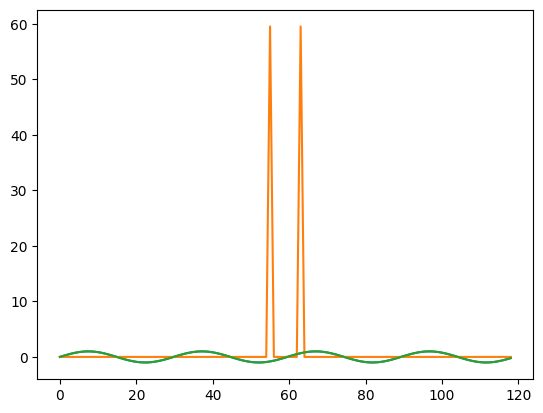

In [11]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, num=120)
xarr = x[:-1]

a = np.sin(4*xarr)
plt.plot(a)
c = fft(a)
#print('fft unshift')
#print(c)
d = fftshift(c)
#print('fft shift')
#print(d)
plt.plot(abs(d))

e = ifftshift(d)
f = ifft(e)
#print('ifft')
#print(f)
plt.plot(f)
plt.show()

## Examples
Poisson 1-D equation with periodic boundary conditions
$$\frac{d^2 f}{d x^2} = sin(4x)$$
If $f_0$ is a solution, $f_1 = f_0 + c$ is also a solution for any constant $c$.

\begin{align*}
\int_0^{2\pi} f_1(x) dx &= \int_0^{2\pi} f_0(x) dx + c (2 \pi) \\
\int_0^{2\pi} f_1(x) dx &= 0
\end{align*}

Solve for $\frac{d^2 f}{d x^2} = sin(4x), \ x \in [0, 2\pi]$

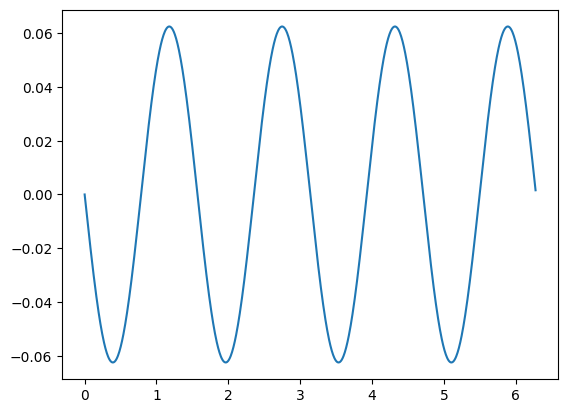

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 1001
x_space = np.linspace(0, 2*np.pi, N+1)
x = x_space[:-1]
#x[-1] = x[0]

s_rhs = np.sin(4*x)
dft_s = np.fft.fft(s_rhs)
ft_s = np.fft.fftshift(dft_s)
# k = np.fft.fftfreq(N, s_rhs)
# k[0] = 0
# k[-1] = 0
# kn = np.fft.fftshift(k)
kn = np.zeros(N)
for i in range(N):
    kn[i] = i - (N-1)/2

cn = np.zeros(N)*(1.0+0.0j)

for i in range(N):
    if abs(kn[i])**2 != 0:
        cn[i] = -ft_s[i]/(abs(kn[i])**2)

dft_c = np.fft.ifftshift(cn)
f = np.fft.ifft(dft_c)

plt.plot(x, f.real)
plt.show()


In [11]:
kn

array([-3.94968251, -1.31840059, -0.8095692 , -0.60555581, -0.50569901,
       -0.45694198, -0.44138826, -0.45502606, -0.50446218, -0.61490561,
       -0.8729307 , -1.77022857, 11.97682793,  1.31330225,  0.70082898,
        0.49109424,  0.39259818,  0.34237971,  0.32004028,  0.31899188,
        0.34034699,  0.39477712,  0.51790392,  0.86529186,  4.09939974,
       -1.32099528, -0.55840587, -0.35781648, -0.27007917, -0.22480381,
       -0.20123995, -0.19195381, -0.19515277, -0.21363176, -0.25883309,
       -0.37412965, -0.88606812,  1.36761426,  0.35085653,  0.19398305,
        0.13231896,  0.10044713,  0.08173253,  0.07007938,  0.06283366,
        0.05884254,  0.05796438,  0.06170342,  0.07963432,        -inf,
               nan,  0.03981716,  0.04113561,  0.04347328,  0.04707403,
        0.05236138,  0.06006804,  0.07151596,  0.08928633,  0.11908707,
        0.17634822,  0.32161848,  1.26241316, -0.82277754, -0.34918767,
       -0.24265602, -0.20106518, -0.18431095, -0.18185098, -0.19